****Movie Rating Prediction Task (Data Science Intern-CodSoft)****

In [221]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
# import dataset
df = pd.read_csv('/content/IMDb Movies India.csv', encoding = 'latin-1')

In [223]:
#!pip install pandas_profiling


In [224]:
# # Data Profiling
# import ydata_profiling as pandas_profiling

# # Generate a Pandas Profiling Report for initial data exploration
# report = pandas_profiling.ProfileReport(df)
# display(report)

In [225]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [226]:
print(df.describe())

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [227]:
df.shape

(15509, 10)

In [228]:
df.keys()

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [230]:
# Plot the number of movies released by year
year_count = df['Year'].value_counts().reset_index()
year_count.columns = ['Year', 'Count']

In [231]:
import plotly.express as px
fig = px.bar(year_count, x='Year', y='Count', text='Count', title='Number of Movies Released by Year')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis=dict(title='Year of Movie Release', titlefont_size=16),
    yaxis=dict(title='Count of Movies Released', titlefont_size=16, tickfont_size=14),
)
fig.show()


In [232]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [233]:
#df.dropna(subset=['Duration','Votes'], inplace=True)

In [234]:
df.shape


(15509, 10)

In [235]:
df['Year'].unique()


array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [236]:
df['Year'].isnull().sum()

528

In [237]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [238]:
# Handling missing values & Data Cleaning

# Convert 'Year' to string type
df['Year'] = df['Year'].astype(str)

# Extract numeric part and convert to integer
df['Year'] = df['Year'].str.extract('(\d+)')

# Fill missing values with the mode of the 'Year' column
df['Year'].fillna(df['Year'].mode()[0], inplace=True)

# Convert the 'Year' column to integer
df['Year'] = df['Year'].astype(int)

# Display the resulting DataFrame
print(df['Year'])


0        2019
1        2019
2        2021
3        2019
4        2010
         ... 
15504    1988
15505    1999
15506    2005
15507    1988
15508    1998
Name: Year, Length: 15509, dtype: int64


In [239]:
df['Year'].unique()

array([2019, 2021, 2010, 1997, 2005, 2008, 2012, 2014, 2004, 2016, 1991,
       1990, 2018, 1987, 1948, 1958, 2017, 2020, 2009, 2002, 1993, 1946,
       1994, 2007, 2013, 2003, 1998, 1979, 1951, 1956, 1974, 2015, 2006,
       1981, 1985, 2011, 2001, 1967, 1988, 1995, 1959, 1996, 1970, 1976,
       2000, 1999, 1973, 1968, 1943, 1953, 1986, 1983, 1989, 1982, 1977,
       1957, 1950, 1992, 1969, 1975, 1947, 1972, 1971, 1935, 1978, 1960,
       1944, 1963, 1940, 1984, 1934, 1955, 1936, 1980, 1966, 1949, 1962,
       1964, 1952, 1933, 1942, 1939, 1954, 1945, 1961, 1965, 1938, 1941,
       1931, 1937, 2022, 1932, 1923, 1915, 1928, 1922, 1917, 1913, 1930,
       1926, 1914, 1924])

In [240]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,2019,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [241]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15509 non-null  int64  
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.2+ MB


In [242]:
from sklearn.impute import SimpleImputer

# Handling missing values & Data Cleaning


# Convert 'Duration' to numeric by removing 'min' and impute missing values with the median duration
df['Duration'] = df['Duration'].astype(str).str.replace('min', '').astype(float)
df['Duration'].fillna(df['Duration'].median(), inplace=True)

# Impute missing 'Genre' values with the most frequent genre
most_frequent_genre = df['Genre'].astype(str)
most_frequent_genre = df['Genre'].mode().iloc[0]
df['Genre'].fillna(most_frequent_genre, inplace=True)

# Impute missing 'Rating' values with the mean rating
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

# Remove non-numeric characters and convert 'Votes' to numeric, then impute missing values with the median votes
df['Votes'] = df['Votes'].str.replace('[^\d.]', '', regex=True).astype(float)
df['Votes'].fillna(df['Votes'].median(), inplace=True)

# Impute missing 'Director' values with the most frequent director
most_frequent_director = df['Director'].mode().iloc[0]
df['Director'].fillna(most_frequent_director, inplace=True)

# Impute missing 'Actor 1', 'Actor 2', 'Actor 3' values with "Unknown"
df[['Actor 1', 'Actor 2', 'Actor 3']] = df[['Actor 1', 'Actor 2', 'Actor 3']].fillna("Unknown")
df[['Actor 1']] = df[['Actor 1']].astype(str)
# Explore data and perform initial analysis after handling missing values
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15509 non-null  int64  
 2   Duration  15509 non-null  float64
 3   Genre     15509 non-null  object 
 4   Rating    15509 non-null  float64
 5   Votes     15509 non-null  float64
 6   Director  15509 non-null  object 
 7   Actor 1   15509 non-null  object 
 8   Actor 2   15509 non-null  object 
 9   Actor 3   15509 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.2+ MB
None
               Year      Duration        Rating          Votes
count  15509.000000  15509.000000  15509.000000   15509.000000
mean    1988.101232    129.658585      5.841621    1016.735003
std       25.644978     19.805742      0.987343    8343.751828
min     1913.000000      2.000000      1.100000       5.000000
25%     1969.000000    131.000000      5.

<ipython-input-243-08528256b3d1>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



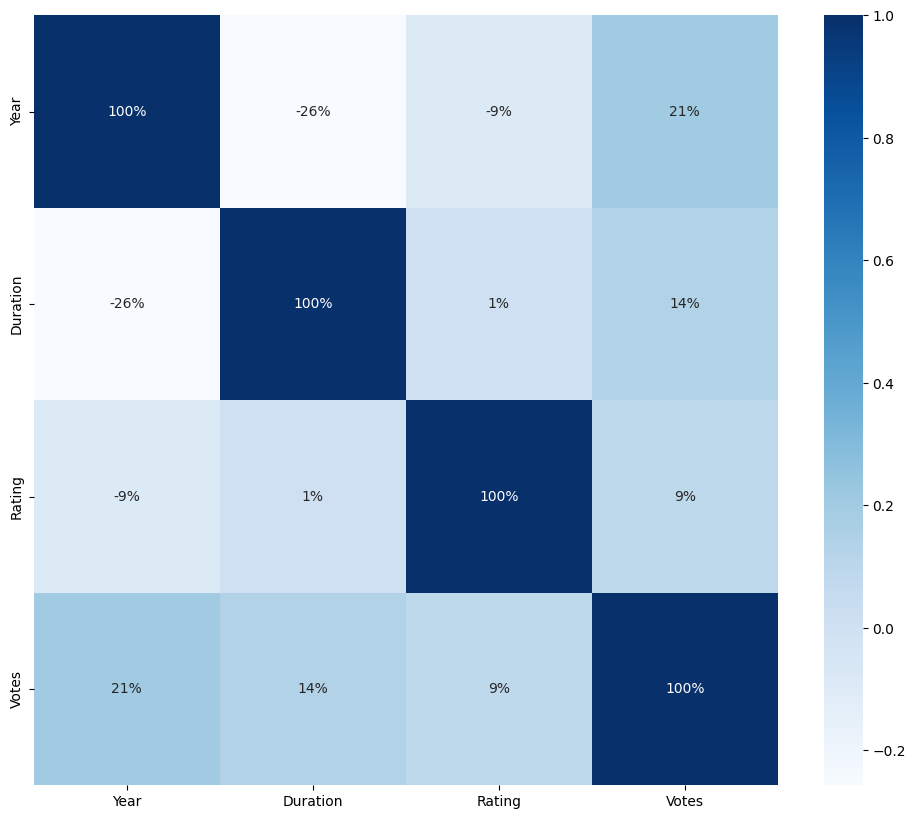

In [243]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(method='spearman'),annot=True,cmap="Blues", fmt='.0%')
plt.show()

In [244]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,2019,131.0,Drama,5.841621,55.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.000000,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.0,"Drama, Musical",5.841621,55.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.0,"Comedy, Romance",4.400000,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.0,Drama,5.841621,55.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [245]:
# Feature Engineering
# Example: Create a 'Total Actors' feature as the sum of top 3 actors
df['Total Actors'] = df[['Actor 1', 'Actor 2', 'Actor 3']].sum(axis=1)


In [246]:
# Data Preprocessing
# Encode categorical features(Genre, Director, Actors)
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
categorical_cols = ['Year', 'Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3','Total Actors']


for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [247]:
df.drop(['Actor 1','Actor 2','Actor 3'], axis = 1, inplace = True)

In [248]:
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Total Actors
0,,98,89,299,5.841621,55.0,1926,6484
1,#Gadhvi (He thought he was Gandhi),98,67,299,7.000000,8.0,1548,9618
2,#Homecoming,100,48,351,5.841621,55.0,5123,10837
3,#Yaaram,98,68,228,4.400000,35.0,3319,8395
4,...And Once Again,89,63,299,5.841621,55.0,385,8937


In [249]:
df.isnull().sum()

Name            0
Year            0
Duration        0
Genre           0
Rating          0
Votes           0
Director        0
Total Actors    0
dtype: int64

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          15509 non-null  object 
 1   Year          15509 non-null  int64  
 2   Duration      15509 non-null  int64  
 3   Genre         15509 non-null  int64  
 4   Rating        15509 non-null  float64
 5   Votes         15509 non-null  float64
 6   Director      15509 non-null  int64  
 7   Total Actors  15509 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 969.4+ KB


In [251]:
  # Define features and target
features = ['Genre', 'Director','Votes','Year','Duration','Total Actors']
target = ['Rating']

X = df[features]
y = df[target]

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection and Training
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'Mean Squared Error (MSE)': mse, 'Mean Absolute Error (MAE)': mae, 'R-squared (R2)': r2}

# Display results
for name, result in results.items():
    print(f'Model: {name}')
    print(f'MSE: {result["Mean Squared Error (MSE)"]}')
    print(f'MAE: {result["Mean Absolute Error (MAE)"]}')
    print(f'R-squared: {result["R-squared (R2)"]}')
    print()


<ipython-input-252-118fa9c5999b>:26: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model: Linear Regression
MSE: 0.9191537020446813
MAE: 0.6057806082958658
R-squared: 0.04501266481588517

Model: Random Forest Regression
MSE: 0.6505879749226355
MAE: 0.4277420932395359
R-squared: 0.3240485513009499

Model: Gradient Boosting Regression
MSE: 0.6517273603357808
MAE: 0.4894253120105269
R-squared: 0.3228647464193215

